# Predicting Hospitalization Costs

Chris Defreitas

Fall 2018

Bryant University

# Data Exploration

### Imports

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline
import matplotlib.ticker as mtick
PALETTE = sns.color_palette()
# IMG_PATH = 'C:\\Users\\student\\Documents\\Bryant\\4_Senior\\MATH 490 - Capstone\\Presentation\\Graphs\\'

In [2]:
plt.style.use('seaborn-talk')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

Import dataset

In [5]:
dtype = {'admtype': 'int8',
 'age': 'float16',
 'asource': 'category',
 'campus': 'category',
 'diag_adm': 'category',
 'diag_cat3': 'category',
 'diag_cat4': 'category',
 'er_mode': 'int8',
 'moa': 'int8',
 'pay_ub92': 'int8',
 'provider': 'int8',
 'pt_state': 'category',
 'race': 'int8',
 'sex': 'int8',
 'tot': 'float64',
 'yoa': 'int8'}

In [6]:
# import data using relevant columns and datatypes
df0 = pd.read_csv('df_cleansed2_all.csv', 
                  dtype=dtype
                 )

In [7]:
df0.shape

(1260006, 16)

In [8]:
df0.head()

,pay_ub92,age,sex,provider,moa,yoa,admtype,asource,tot,pt_state,diag_adm,campus,er_mode,race,diag_cat3,diag_cat4
0,6,87.0,2,10,2,5,1,7,3412.0,RI,486,0,0,1,486,486
1,6,38.0,1,10,2,5,1,7,4132.0,RI,5128,0,0,1,512,5128
2,6,22.0,2,10,2,5,1,9,12583.0,RI,29650,0,0,1,296,2965
3,6,45.0,2,10,1,5,1,7,17462.0,RI,7850,0,0,1,785,7850
4,6,26.0,2,10,1,5,2,1,10357.0,RI,650,0,0,9,650,650


In [9]:
df1 = df0.copy(deep=True)

## Descriptive Statistics

In [10]:
df1.describe()

,pay_ub92,age,sex,provider,moa,yoa,admtype,tot,er_mode,race
count,1.260006e+06,1260006.0,1.260006e+06,1.260006e+06,1.260006e+06,1.260006e+06,1.260006e+06,1.260006e+06,1.260006e+06,1.260006e+06
mean,6.974931e+00,NaN,1.575253e+00,7.722971e+00,6.445280e+00,8.901591e+00,1.794357e+00,2.576076e+04,1.559590e+00,1.712654e+00
std,1.581252e+01,0.0,5.003815e-01,4.464871e+00,3.442302e+00,2.556645e+00,1.039854e+00,4.533506e+04,3.051898e+00,1.805423e+00
min,1.000000e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,29.0,1.000000e+00,4.000000e+00,3.000000e+00,7.000000e+00,1.000000e+00,8.692000e+03,0.000000e+00,1.000000e+00
50%,4.000000e+00,53.0,2.000000e+00,5.000000e+00,6.000000e+00,9.000000e+00,1.000000e+00,1.547300e+04,0.000000e+00,1.000000e+00
75%,6.000000e+00,74.0,2.000000e+00,1.300000e+01,9.000000e+00,1.100000e+01,3.000000e+00,2.809100e+04,1.000000e+00,1.000000e+00
max,9.900000e+01,124.0,9.000000e+00,1.600000e+01,1.200000e+01,1.300000e+01,9.000000e+00,3.080197e+06,9.000000e+00,9.000000e+00


In [11]:
def summary_graph(attr, attr_name=None, df=df1, agg="count", map=None, target='tot', target_name=None, title=None, kind='bar'):
    df= df.copy(deep=True)
    # map
    if map != None:
        df[attr] = df[attr].map(map)
        
    # set label names
    xlabel = attr_name or attr.title()
    ylabel = target_name or target.title()
    title = title or "{} of {}".format(agg, xlabel).title()
    
    data = df.groupby(attr, as_index=True).agg({target: agg})
    print(data)
    print(data.columns)
    
    ax = data[target].plot(kind=kind, title=title)
    ax.set(xlabel=xlabel, ylabel=ylabel)

            tot
sex            
Female   723734
Male     536136
Unknown     136
Index(['tot'], dtype='object')


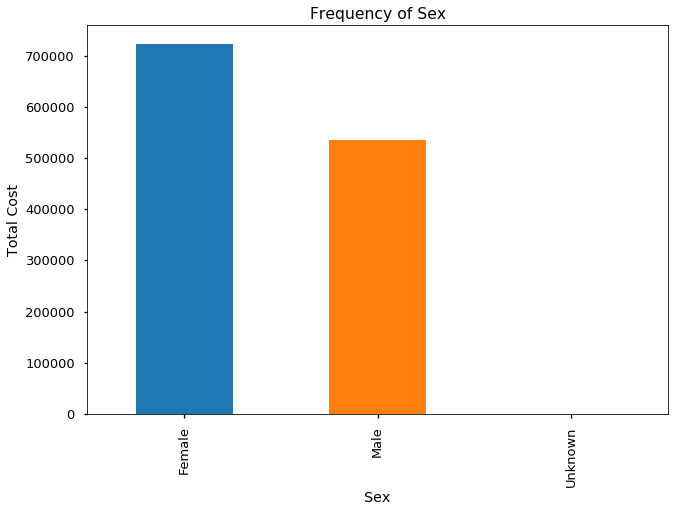

In [12]:
summary_graph('sex', agg="count", map={1: "Male", 2: "Female", 9: "Unknown"}, target_name="Total Cost", 
              title="Frequency of Sex")

                  tot
sex                  
Female   23682.122090
Male     28571.262654
Unknown   7909.941176
Index(['tot'], dtype='object')


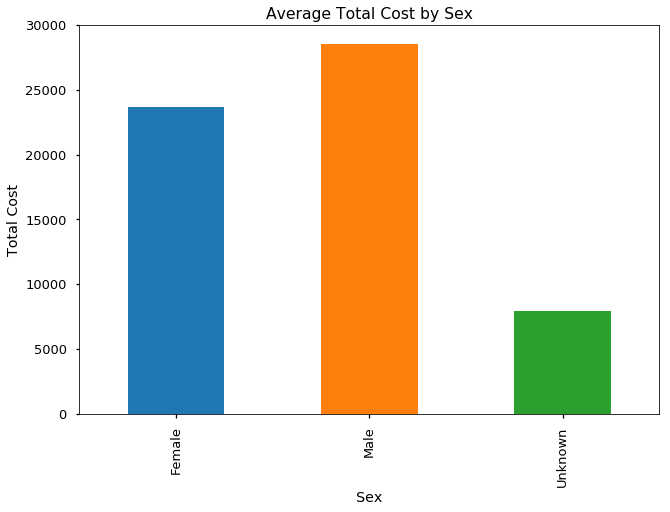

In [13]:
summary_graph('sex', agg="mean", map={1: "Male", 2: "Female", 9: "Unknown"}, target_name="Total Cost", 
              title="Average Total Cost by Sex")

              tot
admtype          
Electric   228234
Emergency  710938
Newborn    108860
Unknown       839
Urgent     211135
Index(['tot'], dtype='object')


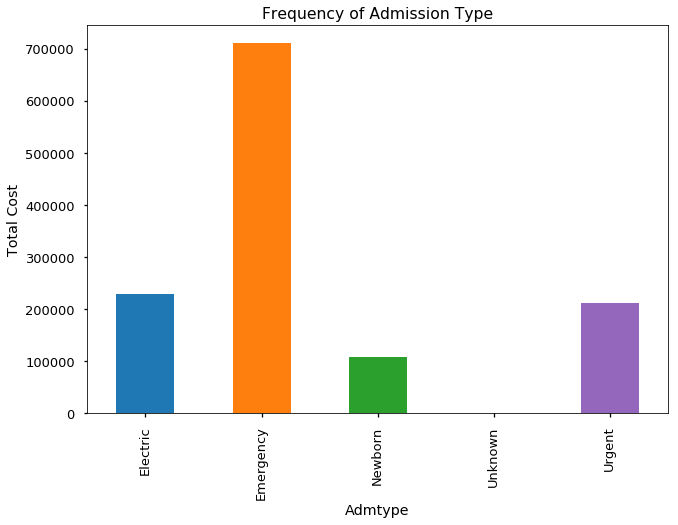

In [14]:
summary_graph('admtype', agg="count", target_name="Total Cost", map={1: "Emergency", 2: "Urgent", 3: "Electric", 4: "Newborn", 5: "Trauma", 9: "Unknown"},
             title="Frequency of Admission Type")

                    tot
admtype                
Electric   29119.199072
Emergency  26354.342581
Newborn    15049.737323
Unknown    18680.200238
Urgent     25682.303716
Index(['tot'], dtype='object')


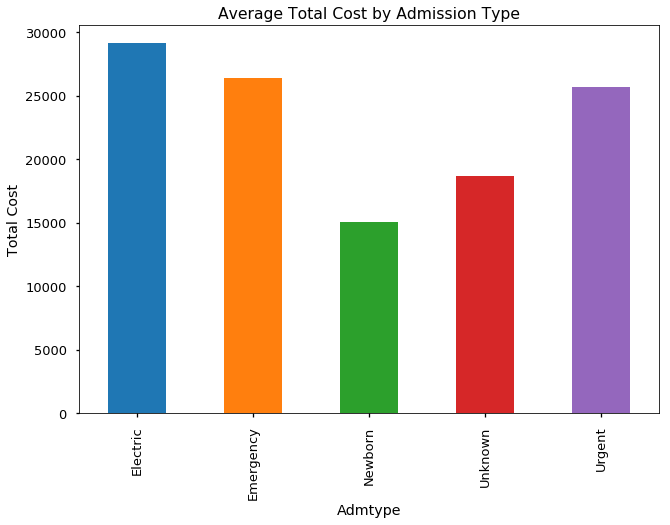

In [15]:
summary_graph('admtype', agg="mean", target_name="Total Cost", map={1: "Emergency", 2: "Urgent", 3: "Electric", 4: "Newborn", 5: "Trauma", 9: "Unknown"},
             title="Average Total Cost by Admission Type")

              tot
admtype          
Electric   228234
Emergency  710938
Newborn    108860
Unknown       839
Urgent     211135
Index(['tot'], dtype='object')


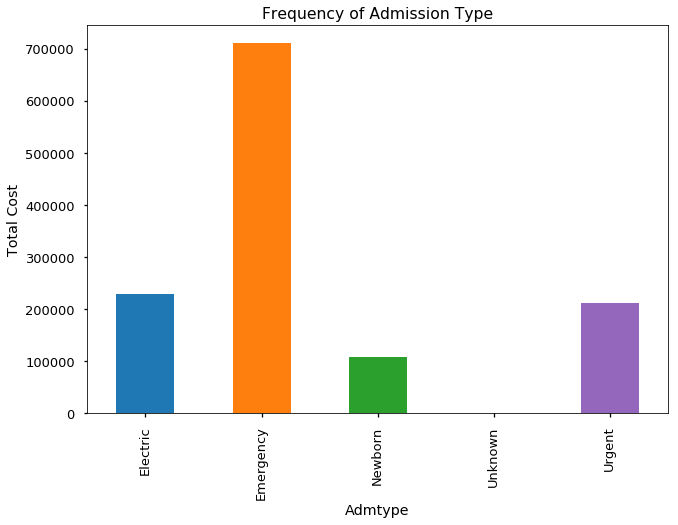

In [16]:
summary_graph('admtype', agg="count", target_name="Total Cost", map={1: "Emergency", 2: "Urgent", 3: "Electric", 4: "Newborn", 5: "Trauma", 9: "Unknown"},
             title="Frequency of Admission Type")

                    tot
er_mode                
Ambulance        112985
Helicopter           54
Law Enforcement     664
No ER Visit:     887156
Other              9865
Personal          88571
Unknown          160711
Index(['tot'], dtype='object')


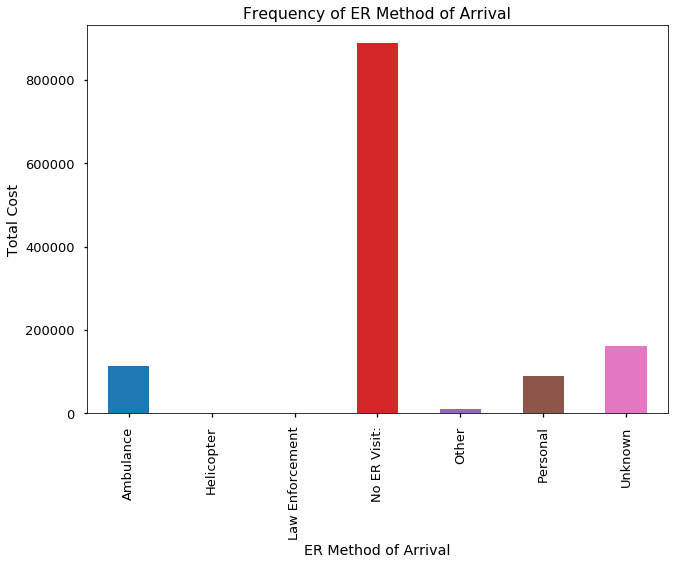

In [17]:
summary_graph('er_mode', attr_name="ER Method of Arrival", agg="count", target_name="Total Cost", map={0: "No ER Visit:", 1: "Ambulance", 2: "Helicopter", 3: "Law Enforcement", 4: "Personal", 5: "Other", 9: "Unknown"},
             title="Frequency of ER Method of Arrival", kind='bar')

                          tot
er_mode                      
Ambulance        25941.119264
Helicopter       80246.148148
Law Enforcement  19071.103916
No ER Visit:     26680.078899
Other            17680.551951
Personal         19809.235495
Unknown          24344.486638
Index(['tot'], dtype='object')


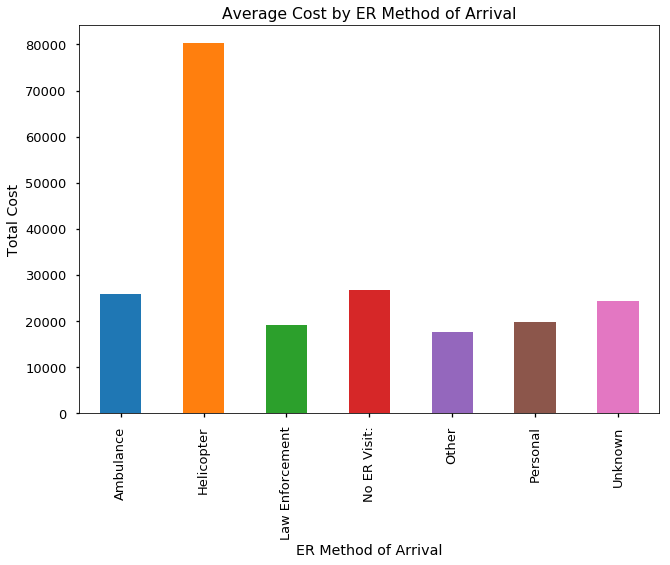

In [18]:
summary_graph('er_mode', attr_name="ER Method of Arrival", agg="mean", target_name="Total Cost", map={0: "No ER Visit:", 1: "Ambulance", 2: "Helicopter", 3: "Law Enforcement", 4: "Personal", 5: "Other", 9: "Unknown"},
             title="Average Cost by ER Method of Arrival")

## Correlation for Continuous Data

In [19]:
data = df1[['age', 'sex', 'yoa', 'moa', 'tot']]

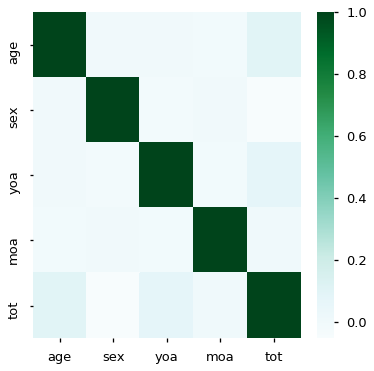

In [21]:
plt.figure(figsize=(6,6)) 
sns.heatmap(data.corr(), cmap='BuGn')

## Age to Total Cost

In [22]:
bins = (0, 1, 5, 11, 18, 25, 35, 66, 85, 129) 
group_names = ['Newborn', 'Toddler', 'Child', 'Teenager', 'Student',
    'Young Adult', 'Adult', 'Senior', 'Elder'] 
categories = pd.cut(df1.age, bins, labels=group_names) 
df1 = df1.assign(age_groups=categories)

In [23]:
def graph_quantiles(df, attr, quants):
    gb = df[[attr, 'tot']].groupby(attr, as_index=True).quantile(quants).unstack()
    print(df[[attr, 'tot']].groupby(attr, as_index=True).count())
    fig, ax = plt.subplots()
    ax.set_ylabel('Total Cost')
    #ax.set_xticks(group_names)
    ax.set_title('Total Cost Quantiles by {}'.format(attr))
    gb.plot.bar(ax=ax, stacked=True, width=1)

                tot
age_groups         
Newborn        5802
Toddler       11590
Child         13955
Teenager      39882
Student       71341
Young Adult  123075
Adult        437493
Senior       319479
Elder        110316


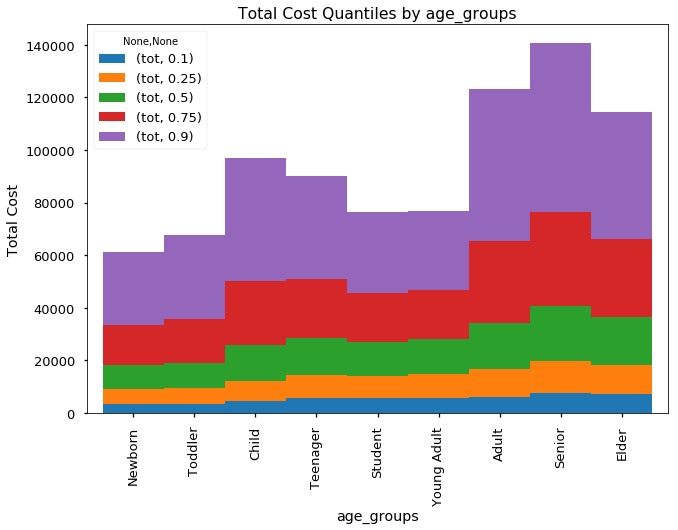

In [24]:
quants = [.1, .25, .5, .75, .9]
graph_quantiles(df1, 'age_groups', quants)

## Explore some diagnoses

In [25]:
def plot_diags(attr, names, attr_name=None, target='tot', target_name=None,  title=None, scale='area'):
    # filter
    dfi = df1[df1[attr].isin([*names])]
    dfi[attr] = dfi[attr].cat.remove_unused_categories()
    
    # map codes to names
    dfi[attr] = dfi[attr].map(names)
        
    # graph
    ax = sns.violinplot(x=dfi[attr], y=dfi[target], cut=0, scale=scale)
    
    # format
    target_name, attr_name = target_name or target, attr_name or attr
    ax.set_title(title or "{} by {}".format(target_name, attr_name))
    ax.set_xlabel(attr_name)
    ax.set_ylabel(target_name)

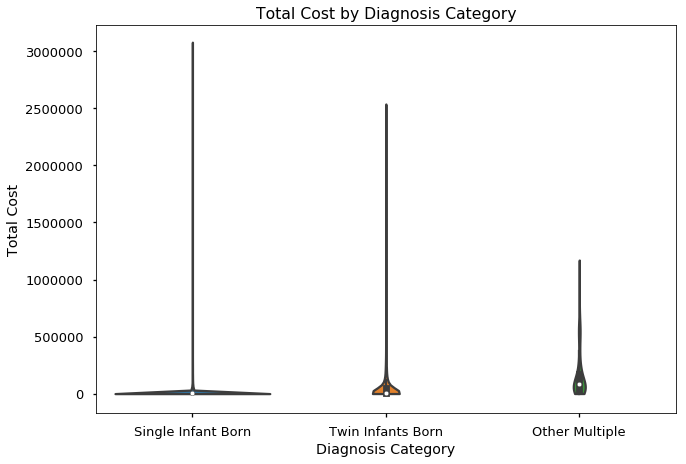

In [26]:
names = {'V30': "Single Infant Born",
         'V31': "Twin Infants Born",
         'V34': "Other Multiple",
      }
plot_diags('diag_cat3', names=names, attr_name='Diagnosis Category', target_name='Total Cost')
          

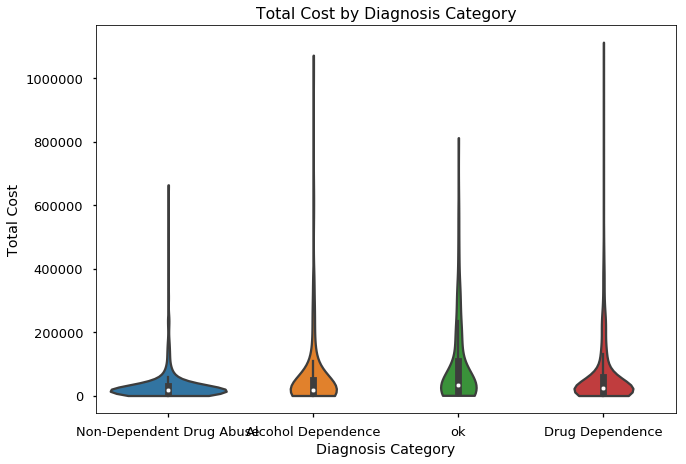

In [27]:
names = {'800': "Alcohol Dependence",
         '801': "Drug Dependence",
         '802': "Non-Dependent Drug Abuse",
         '803': "ok"
      }
plot_diags('diag_cat3', names=names, attr_name='Diagnosis Category', target_name='Total Cost')
          

Most Common Diagnosis

In [29]:
names = {'V3000': "Single Birth",
         'V3001': "Single Birth Cesarean",
         '486': "Pneumonia",
         '78650': "Chest Pain",
         '64413': "Threatened Labor",
         '311': "Depression",
         '78605': "Shortness of Breath",
         '29690': "Other Mood Disorder",
         '4280': "Congestive Heart Failure",
         '7802': "Loss of Consciousness"
        }

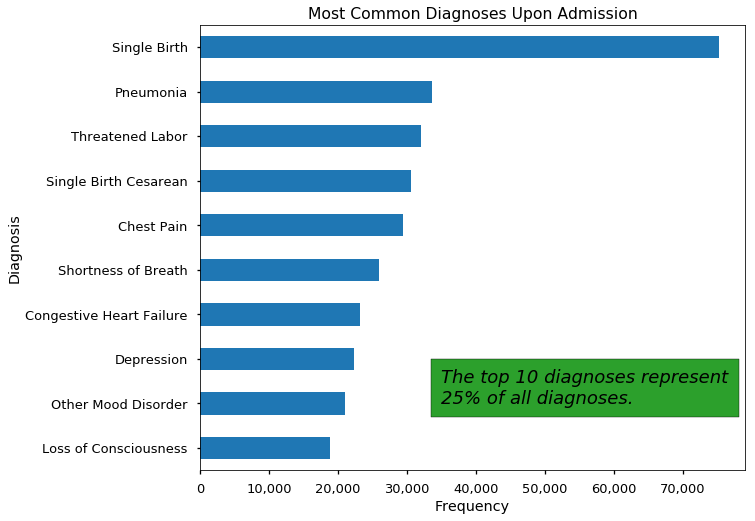

In [31]:
fig, ax = plt.subplots()

gb = df1[['diag_adm', 'tot']].groupby('diag_adm').count()
gb = gb.sort_values(by='tot', ascending=False).head(10).sort_values(by='tot')

gb.index = gb.index.map(names)
gb.plot(kind='barh', ax=ax)
# format
ax.set_title("Most Common Diagnoses Upon Admission")
ax.set_xlabel("Frequency")
ax.set_ylabel("Diagnosis")
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.get_legend().remove()

top_10_pct = round(gb['tot'].sum() / len(df1), 2) * 100

msg = "The top 10 diagnoses represent\n{}% of all diagnoses.".format(int(top_10_pct))
ax.text(35000, 1, msg, style='italic', fontsize=18,
        bbox={'facecolor': PALETTE[2], 'alpha':1, 'pad':10})

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#fig.savefig(IMG_PATH + 'Top 10 Diagnoses.png', dpi=200)

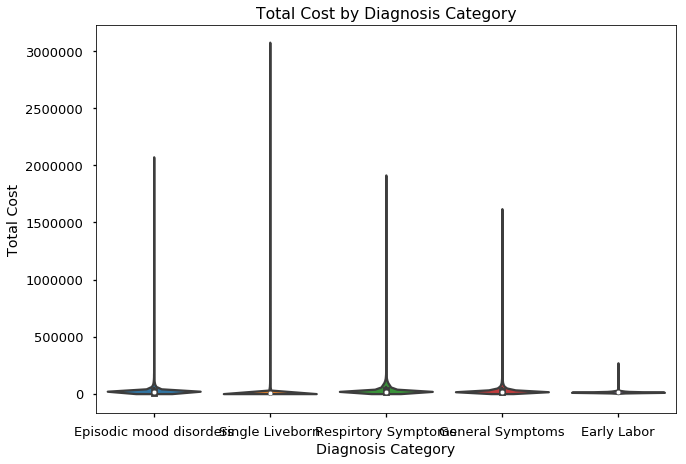

In [57]:
names = {'V30': "Single Liveborn",
         '786': "Respirtory Symptoms",
         '780': "General Symptoms",
         '296': "Episodic mood disorders",
         '644': "Early Labor"
      }
plot_diags('diag_cat3', names=names, attr_name='Diagnosis Category', target_name='Total Cost', scale='width')

## Exploration of Target

In [33]:
desc = df1.tot.describe(percentiles=[.01, .1, .25, .5, .75, .9, .99])

In [34]:
pd.DataFrame(desc.round())

,tot
count,1260006.0
mean,25761.0
std,45335.0
min,1.0
1%,1571.0
10%,4132.0
25%,8692.0
50%,15473.0
75%,28091.0
90%,51524.0


Histogram of total cost

'*Last bin includes all values above $100,000.'

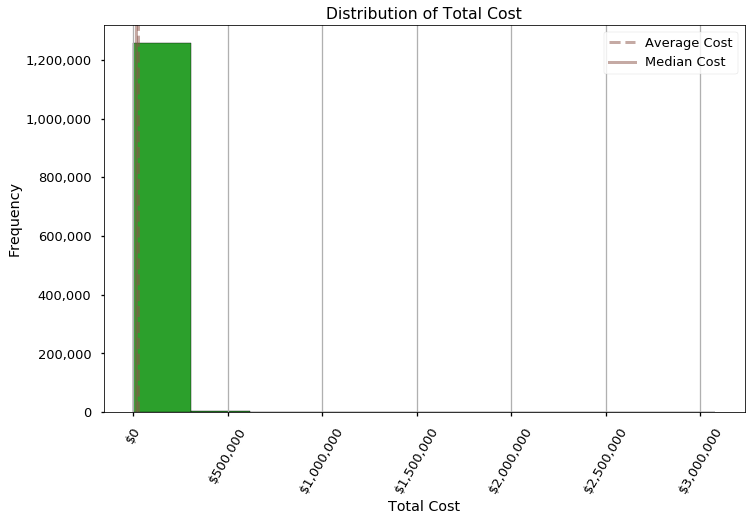

In [39]:
fig, ax = plt.subplots()

data = df1['tot']#.where(df1['tot']<=100000, other=110000)
#bins=range(0, 120000, 10000)

plt.hist(data, color=PALETTE[2], edgecolor='k')
#ax.set_xticks(np.arange(0, 110000, step=10000))

plt.title('Distribution of Total Cost')
lines = [plt.axvline(df1['tot'].mean(), color=PALETTE[5], linestyle='--', linewidth=3, alpha=.5),
         plt.axvline(df1['tot'].median(), color=PALETTE[5], linestyle='-', linewidth=3, alpha=.5)]

ax.legend(lines, ['Average Cost', 'Median Cost'])

ax.set_xlabel('Total Cost')
ax.set_ylabel('Frequency')
plt.xticks(rotation=60)

ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.grid(None, axis='x')

#ax.annotate('Contains all\nvalues greater\nthan $100,000', xy=(105000, 10000), xytext=(101000, 108000),
#            arrowprops=dict(facecolor='black', shrink=0.05))


plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#fig.savefig(IMG_PATH + 'Skewed Target Distribution.png', dpi=200)
"*Last bin includes all values above $100,000."

'*Last bin includes all values above $100,000.'

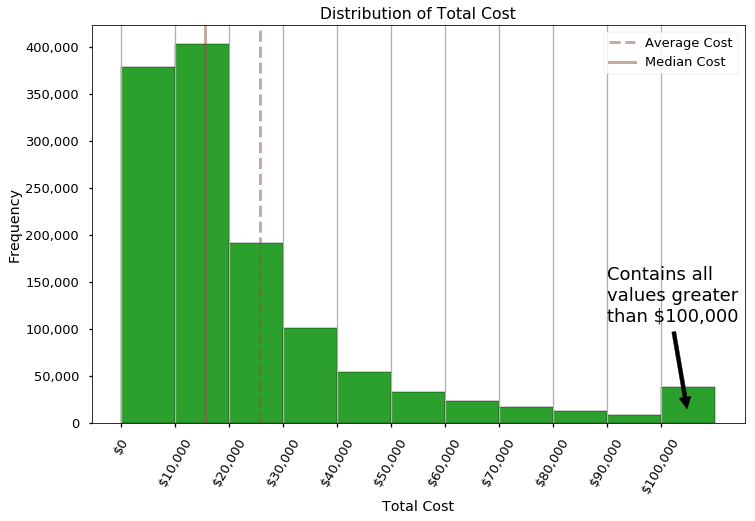

In [42]:
fig, ax = plt.subplots()

data = df1['tot'].where(df1['tot']<=100000, other=110000)
bins=range(0, 120000, 10000)

plt.hist(data, bins=bins, color=PALETTE[2], edgecolor='k')
ax.set_xticks(np.arange(0, 110000, step=10000))

plt.title('Distribution of Total Cost')
lines = [plt.axvline(df1['tot'].mean(), color=PALETTE[5], linestyle='--', linewidth=3, alpha=.5),
         plt.axvline(df1['tot'].median(), color=PALETTE[5], linestyle='-', linewidth=3, alpha=.5)]

ax.legend(lines, ['Average Cost', 'Median Cost'])

ax.set_xlabel('Total Cost')
ax.set_ylabel('Frequency')
plt.xticks(rotation=60)

ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.grid(None, axis='x')

ax.annotate('Contains all\nvalues greater\nthan $100,000', xy=(105000, 10000), xytext=(90000, 108000), fontsize=18,
            arrowprops=dict(facecolor='black', shrink=0.05))


plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#fig.savefig(IMG_PATH + 'Target Distribution.png', dpi=200)
"*Last bin includes all values above $100,000."

## ANOVA for diag_adm

In [47]:
#mod = ols('tot ~ diag_adm', data=df3_arrival).fit()

In [48]:
#aov_table = sm.stats.anova_lm(mod, tpy=2)
#print(aov_table)

In [49]:
#                df        sum_sq       mean_sq          F  PR(>F)
#diag_adm    6639.0  1.238547e+14  1.865563e+10  12.227963     0.0
#Residual  459800.0  7.014952e+14  1.525653e+09        NaN     NaN

In [50]:
mod = ols('tot ~ sex', data=df1).fit()

In [51]:
aov_table = sm.stats.anova_lm(mod, tpy=2)
print(aov_table)

                 df        sum_sq       mean_sq            F  PR(>F)
sex             1.0  7.360100e+12  7.360100e+12  3591.294632     0.0
Residual  1260004.0  2.582287e+15  2.049428e+09          NaN     NaN


In [52]:
mod = ols('tot ~ er_mode', data=df1).fit()

In [53]:
aov_table = sm.stats.anova_lm(mod, tpy=2)
print(aov_table)

                 df        sum_sq       mean_sq           F         PR(>F)
er_mode         1.0  1.758354e+12  1.758354e+12  856.116057  3.937345e-188
Residual  1260004.0  2.587889e+15  2.053874e+09         NaN            NaN


In [54]:
mod = ols('tot ~ moa', data=df1).fit()

In [55]:
aov_table = sm.stats.anova_lm(mod, tpy=2)
print(aov_table)

                 df        sum_sq       mean_sq          F        PR(>F)
moa             1.0  7.350121e+10  7.350121e+10  35.763342  2.228605e-09
Residual  1260004.0  2.589574e+15  2.055211e+09        NaN           NaN
